# Species Data Set - Part A

## Problem Statement:-

1. Plot a histogram for "the count of all the rodents over the years" TODO: Add some interesting groupby type

2. PLot a bar graph showing the distribution of rodents discovered in the winter season.(from dec 1 to feb 28th)

3. Plot the count of female and male species discovered over the years (Refer to Stacked Bar Charts)

## Files Required:-

1. Species.csv
2. Surveys.csv

## Importing Packages

In [2]:
#Importing Various packages --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
#Plots to be forced 'inline'
%matplotlib inline

## Reading from CSV Files

In [4]:
csv_file_1 = pd.read_csv('species.csv')
csv_file_2 = pd.read_csv('surveys.csv')

## Final Table

In [5]:
# Merged the two Dataframes into one DataFrame
Final_table = pd.merge(csv_file_1, csv_file_2, on='species_id')

In [6]:
Final_table.shape

(34786, 12)



.
## PROBLEM STATEMENT 1.0

#### Plot a histogram for "the count of all the rodents over the years"

In [7]:
# DataFrame filtered, containing Rodent and Year
data_with_rodent_year = Final_table.loc[ Final_table['taxa'] == 'Rodent', 'year']

#### Histogram - No. of Rodents Vs Year

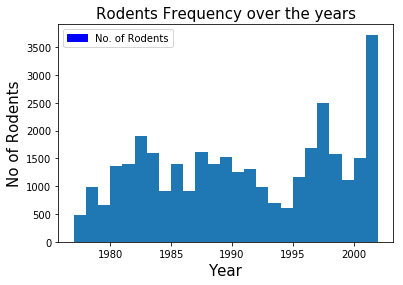

In [35]:
#Histogram Legends --
plt.title("Rodents Frequency over the years", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("No of Rodents", fontsize=15)
#Adding Blue colour 
blue_patch = mpatches.Patch(color='blue', label='No. of Rodents')
plt.legend(handles = [blue_patch])

plt.hist(data_with_rodent_year, bins=25)
plt.show()

##### Graph 1.0 : Graph shows the number of RODENTS discovered over the year. This trend shows the obvious increase in Rodents discovered over the years. There has been two falls recored in 1984 and 1994 and an abrupt peak recorded in 1997-98

## PROBLEM STATEMENT 1.1

#### Plot a bar graph showing the distribution of rodents discovered in the winter season ( From Dec 1 to Feb 28th )

In [9]:
# DataFrame containing Rodent, Day, Month and yearMonth
data_with_rodent_DMY = Final_table[['taxa','month','day','year']]

#### Condition for Winter

In [10]:
# Condition for Winter Season (1st Dec TO 28th Feb) --
winter_months = data_with_rodent_DMY[(data_with_rodent_DMY.month == 1) | 
                                     ((data_with_rodent_DMY.month == 2) & (data_with_rodent_DMY.day <= 28)) | 
                                     (data_with_rodent_DMY.month == 12)]

#Only for Rodents --
data_with_rodent_Winter = winter_months[winter_months.taxa == 'Rodent']

#### Bar Graph can be drawn for -  No. of Rodents : 
1. per month wise.
2. per year wise


#### Bar Graph - No. of Rodents in Winter Season Vs Month

In [11]:
# Plot containing Year, month, day and Rodent
#my_bar = data_with_rodent_inWinter.groupby(['month']).taxa.count()

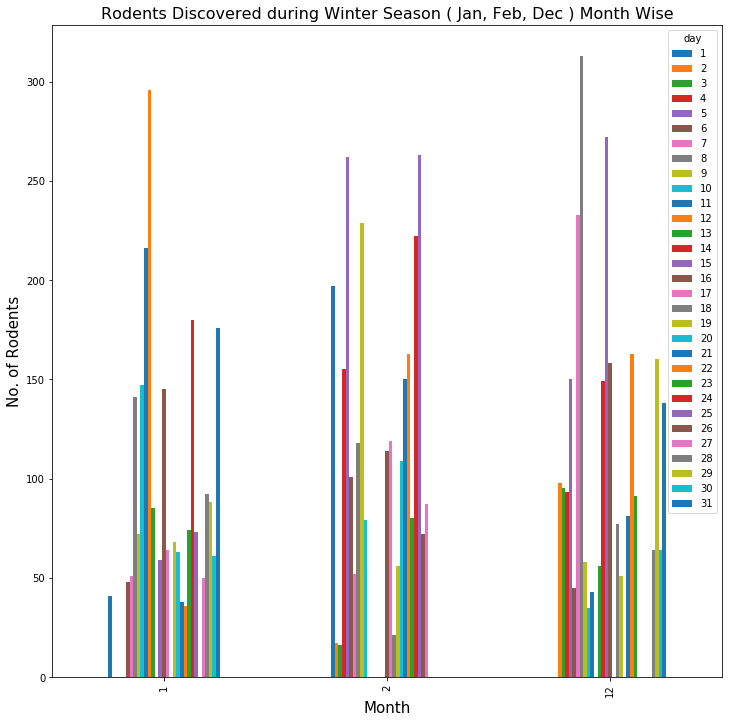

In [38]:
#Plotting a Bar Graph (By Month)--
bar_plot_R_M = pd.crosstab(data_with_rodent_Winter.month, data_with_rodent_Winter.day).plot(kind='bar', 
                                                                                            legend=True, 
                                                                                            figsize=(12,12))
bar_plot_R_M.set_title("Rodents Discovered during Winter Season ( Jan, Feb, Dec ) Month Wise", fontsize=16)
bar_plot_R_M.set_xlabel("Month", fontsize=15)
bar_plot_R_M.set_ylabel("No. of Rodents", fontsize=15)

##### Graph 1.1 : Graph shows the number of RODENTS discovered during winter season (per month). This trend shows a peak in discovery during inital days of the month in Jan


####  Bar graph - No. of Rodents in Winter season Vs Year

In [13]:
# Storing Value Count of Rodents per year (1977-2002) in Winter Season only
data_with_rodent_Winter_year = data_with_rodent_Winter.year.value_counts()

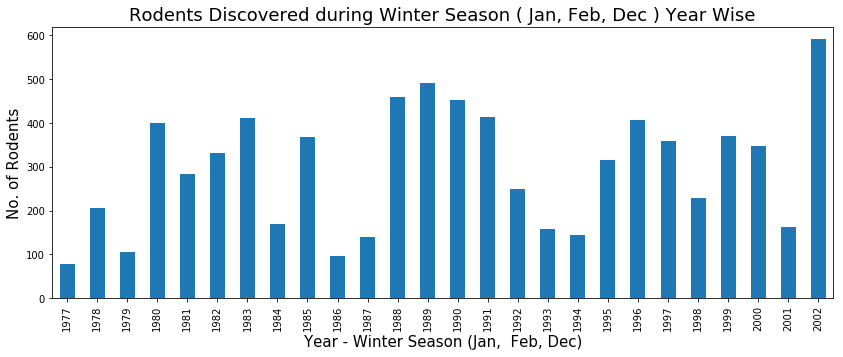

In [39]:
# Plotting a Bar graph
bar_plot_R_Y = data_with_rodent_Winter_year.sort_index().plot(kind='bar', figsize=(14,5))

bar_plot_R_Y.set_title("Rodents Discovered during Winter Season ( Jan, Feb, Dec ) Year Wise", fontsize=18)
bar_plot_R_Y.set_xlabel("Year - Winter Season (Jan,  Feb, Dec)", fontsize=15)
bar_plot_R_Y.set_ylabel("No. of Rodents", fontsize=15)

##### Graph 1.2 : Graph shows the number of RODENTS discovered during winter season (per year). This trend shows a peak in discovery during 1989. The obvious increase in there along the years.

.
## PROBLEM STATEMENT 1.2

#### Plot the count of female and male species discovered over the years (Stacked Bar Charts)

In [15]:
# DataFrame containing Gender and Year
data_with_gender_year = Final_table[['sex','year']].sort_values('year')

##### Only Rodents has been classified as Male and Female in the taken datasheet, so only RODENTS will be considered for further analysis

In [16]:
#Crosstab Feature of Pandas--
data_with_gender_as_year_index = pd.crosstab(data_with_gender_year.year, data_with_gender_year.sex)

### Stacked Bar Chart - Species based on Gender Vs Year

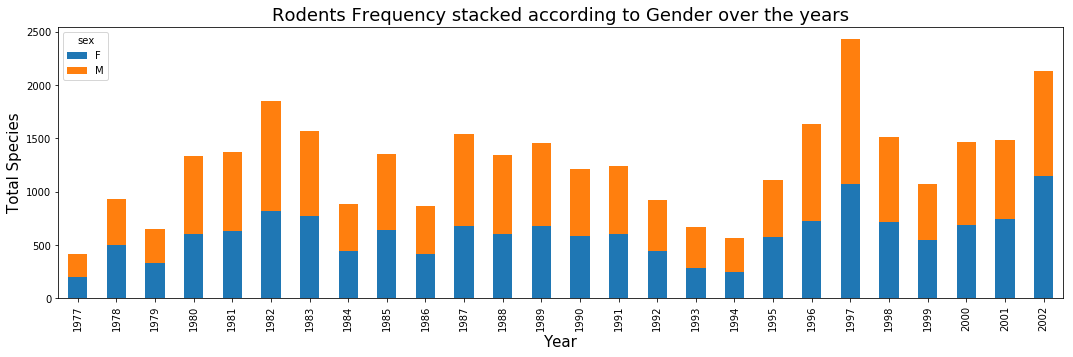

In [31]:
# Bar Chart Legends --
bar_plot_Gender_Y = data_with_gender_as_year_index.plot(kind='bar', stacked=True, figsize=(18,5))

bar_plot_Gender_Y.set_title("Rodents Frequency stacked according to Gender over the years", fontsize=18)
bar_plot_Gender_Y.set_xlabel("Year", fontsize=15)
bar_plot_Gender_Y.set_ylabel("Total Species", fontsize=15)

##### Graph 1.3 : Graph shows the number of RODENTS based on Gender discovered over the years. 

## Alternative Method 

##### Without using 'crosstab'

In [18]:
# Formed two New Series containg Male and Female counts :-
male = data_with_gender_year[data_with_gender_year.sex == 'M'].year.value_counts()
female = data_with_gender_year[data_with_gender_year.sex == 'F'].year.value_counts()

# Adding the two New Series formed into a DataFrame --
data_with_TotalM_TotalF_year = pd.DataFrame({'Total_M': male, 'Total_F':female})

### Stacked Bar Chart

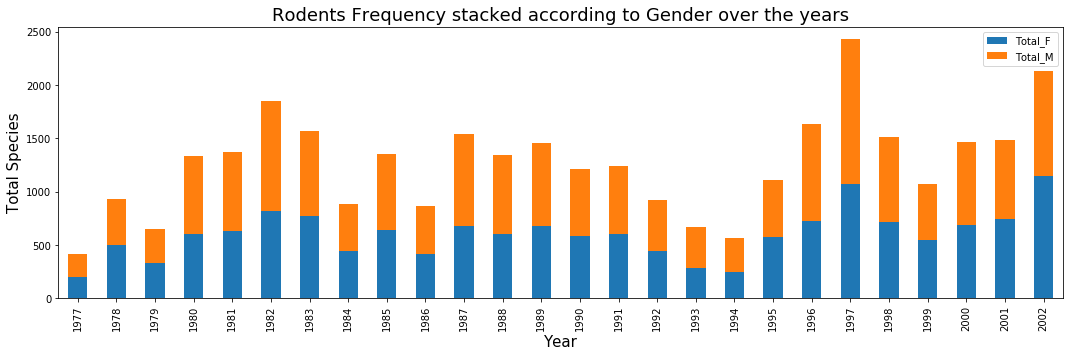

In [33]:
bar_plot_TM_TF_Y = data_with_TotalM_TotalF_year.plot(kind='bar', stacked='True', figsize=(18,5))

bar_plot_TM_TF_Y.set_title("Rodents Frequency stacked according to Gender over the years", fontsize=18)
bar_plot_TM_TF_Y.set_xlabel("Year", fontsize=15)
bar_plot_TM_TF_Y.set_ylabel("Total Species", fontsize=15)

##### Graph 1.4 :  Graph shows the number of RODENTS based on Gender discovered over the years. This plot has been developed using a longer method but with better clarity.